# Chapter 4 Regression and Prediction
### Imported libraries

In [35]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from dmba import stepwise_selection
from dmba import AIC_score
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.gam.api import GLMGam, BSplines

### The Regression Equation

In [2]:
lung = pd.read_csv('LungDisease.csv')

predictors = ['Exposure']
outcome = 'PEFR'

model = LinearRegression()
model.fit(lung[predictors], lung[outcome])

print(f'Intercept: {model.intercept_:.3f}')
print(f'Coefficient Exposure: {model.coef_[0]:.3f}')

Intercept: 424.583
Coefficient Exposure: -4.185


### Fitted Values and Residuals

In [3]:
fitted =model.predict(lung[predictors])
residuals = lung[outcome] - fitted

### Multiple Linear Regression

In [4]:
subset = ['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 
          'Bedrooms', 'BldgGrade']

house = pd.read_csv('house_sales.csv', sep='\t')
house[subset].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [5]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_lm = LinearRegression()
house_lm.fit(house[predictors], house[outcome])

LinearRegression()

In [6]:
print(f'Intercept: {house_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(predictors, house_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -521871.368
Coefficients:
 SqFtTotLiving: 228.83060360240756
 SqFtLot: -0.06046682065306186
 Bathrooms: -19442.84039832111
 Bedrooms: -47769.95518521415
 BldgGrade: 106106.96307898115


### Assessing the Model

In [7]:
fitted = house_lm.predict(house[predictors])
RMSE = np.sqrt(mean_squared_error(house[outcome], fitted))
r2 = r2_score(house[outcome], fitted)
print(f'RMSE: {RMSE:.0f}')
print(f'r2: {r2:.4f}')

RMSE: 261220
r2: 0.5406


In [8]:
model = sm.OLS(house[outcome], house[predictors].assign(const=1))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     5338.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:54:44   Log-Likelihood:            -3.1517e+05
No. Observations:               22687   AIC:                         6.304e+05
Df Residuals:                   22681   BIC:                         6.304e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
SqFtTotLiving   228.8306      3.899     58.694      0.000     221.189     236.472
SqFtLot          -0.0605      0.061     -0.988      0.323      -0.180       0.059
Bathrooms     -1.944e+04   3625.388     -5.363      0.000   -2.65e+04   -1.23e+04
Bedrooms      -4.777e+04   2489.732    -19.187      0.000   -5.27e+04   -4.29e+04
BldgGrade      1.061e+05   2396.445     44.277      0.000    1.01e+05    1.11e+05
const         -5.219e+05   1.57e+04    -33.342      0.000   -5.53e+05   -4.91e+05
==============================================================================
Omnibus:                    29676.557   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         19390738.346
Skew:                           6.889   Prob(JB):                         0.00
Kurtosis:                     145.559   Cond. No.                     2.86e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Model Selection and Stepwise Regression

In [9]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade',
'PropertyType', 'NbrLivingUnits', 'SqFtFinBasement', 'YrBuilt',
'YrRenovated', 'NewConstruction']

X = pd.get_dummies(house[predictors], drop_first=True)
X['NewConstruction'] = [1 if nc else 0 for nc in X['NewConstruction']]

house_full = sm.OLS(house[outcome], X.assign(const=1))
results = house_full.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     2771.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        10:54:45   Log-Likelihood:            -3.1375e+05
No. Observations:               22687   AIC:                         6.275e+05
Df Residuals:                   22674   BIC:                         6.276e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
SqFtTotLiving                198.6364      4.234     46.920      0.000     190.338     206.934
SqFtLot                        0.0771      0.058      1.330      0.184      -0.037       0.191
Bathrooms                   4.286e+04   3808.114     11.255      0.000    3.54e+04    5.03e+04
Bedrooms                   -5.187e+04   2396.904    -21.638      0.000   -5.66e+04   -4.72e+04
BldgGrade                   1.373e+05   2441.242     56.228      0.000    1.32e+05    1.42e+05
NbrLivingUnits              5723.8438   1.76e+04      0.326      0.744   -2.87e+04    4.01e+04
SqFtFinBasement                7.0611      4.627      1.526      0.127      -2.009      16.131
YrBuilt                    -3574.2210     77.228    -46.282      0.000   -3725.593   -3422.849
YrRenovated                   -2.5311      3.924     -0.645      0.519     -10.222       5.160
NewConstruction            -2489.1122   5936.692     -0.419      0.675   -1.41e+04    9147.211
PropertyType_Single Family  2.997e+04   2.61e+04      1.149      0.251   -2.12e+04    8.11e+04
PropertyType_Townhouse      9.286e+04    2.7e+04      3.438      0.001    3.99e+04    1.46e+05
const                       6.182e+06   1.55e+05     39.902      0.000    5.88e+06    6.49e+06
==============================================================================
Omnibus:                    31006.128   Durbin-Watson:                   1.393
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         26251977.078
Skew:                           7.427   Prob(JB):                         0.00
Kurtosis:                     168.984   Cond. No.                     2.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
y = house[outcome]

def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(X[variables], y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(y, [y.mean()]*len(y), model, df=1)
    return AIC_score(y, model.predict(X[variables]), model)

best_model, best_variables = stepwise_selection(X.columns, train_model, score_model, verbose=True)

print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Variables: SqFtTotLiving, SqFtLot, Bathrooms, Bedrooms, BldgGrade, NbrLivingUnits, SqFtFinBasement, YrBuilt, YrRenovated, NewConstruction, PropertyType_Single Family, PropertyType_Townhouse
Start: score=647988.32, constant
Step: score=633013.35, add SqFtTotLiving
Step: score=630793.74, add BldgGrade
Step: score=628230.29, add YrBuilt
Step: score=627784.16, add Bedrooms
Step: score=627602.21, add Bathrooms
Step: score=627525.65, add PropertyType_Townhouse
Step: score=627525.08, add SqFtFinBasement
Step: score=627524.98, add PropertyType_Single Family
Step: score=627524.98, unchanged None
Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420169
 BldgGrade: 137159.56022619663
 YrBuilt: -3565.424939249451
 Bedrooms: -51947.38367361402
 Bathrooms: 42396.16452772084
 PropertyType_Townhouse: 84479.16203300131
 SqFtFinBasement: 7.046974967551216
 PropertyType_Single Family: 22912.055187017668


### Weighted Regression

In [11]:
house['Year'] = [int(date.split('-')[0]) for date in house.DocumentDate]
house['Weight'] = house.Year - 2005

In [12]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_wt = LinearRegression()
house_wt.fit(house[predictors], house[outcome], sample_weight=house.Weight)

LinearRegression()

### Dummy Variables Representation

In [13]:
house.PropertyType.head()

1        Multiplex
2    Single Family
3    Single Family
4    Single Family
5    Single Family
Name: PropertyType, dtype: object

In [14]:
pd.get_dummies(house['PropertyType']).head()

,Multiplex,Single Family,Townhouse
1,1,0,0
2,0,1,0
3,0,1,0
4,0,1,0
5,0,1,0


In [15]:
pd.get_dummies(house['PropertyType'], drop_first=True).head()

,Single Family,Townhouse
1,0,0
2,1,0
3,1,0
4,1,0
5,1,0


In [16]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType']
X = pd.get_dummies(house[predictors], drop_first=True)

house_lm_factor = LinearRegression()
house_lm_factor.fit(X, house[outcome])

print(f'Intercept: {house_lm_factor.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, house_lm_factor.coef_):
    print(f' {name}: {coef}')

Intercept: -446841.366
Coefficients:
 SqFtTotLiving: 223.37362892503802
 SqFtLot: -0.07036798136813438
 Bathrooms: -15979.013473415285
 Bedrooms: -50889.732184830005
 BldgGrade: 109416.305161462
 PropertyType_Single Family: -84678.21629549272
 PropertyType_Townhouse: -115121.97921609186


### Factor Variables with Many Levels

In [17]:
pd.DataFrame(house['ZipCode'].value_counts()).transpose()

,98038,98103,98042,98115,98117,98052,98034,98033,98059,98074,...,98051,98024,98354,98050,98057,98288,98224,98068,98113,98043
ZipCode,788,671,641,620,619,614,575,517,513,502,...,32,31,9,7,4,4,3,1,1,1


In [18]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
zip_groups = pd.DataFrame([
    *pd.DataFrame({
        'ZipCode': house['ZipCode'],
        'residual': house[outcome] - house_lm.predict(house[predictors]),
    })
    .groupby(['ZipCode'])
    .apply(lambda x: {
        'ZipCode': x.iloc[0,0],
        'count': len(x),
        'median_residual': x.residual.median()
    })
]).sort_values('median_residual')
zip_groups['cum_count'] = np.cumsum(zip_groups['count'])
zip_groups['ZipGroup'] = pd.qcut(zip_groups['cum_count'], 5, labels=False, retbins= False)

to_join = zip_groups[['ZipCode', 'ZipGroup']].set_index('ZipCode')
house = house.join(to_join, on='ZipCode')
house['ZipGroup'] = house['ZipGroup'].astype('category')

### Correlated Predictors

In [19]:
print(f'Intercept: {best_model.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(best_variables, best_model.coef_):
    print(f' {name}: {coef}')

Intercept: 6178645.017
Coefficients:
 SqFtTotLiving: 199.2775530420169
 BldgGrade: 137159.56022619663
 YrBuilt: -3565.424939249451
 Bedrooms: -51947.38367361402
 Bathrooms: 42396.16452772084
 PropertyType_Townhouse: 84479.16203300131
 SqFtFinBasement: 7.046974967551216
 PropertyType_Single Family: 22912.055187017668


In [20]:
predictors = ['Bedrooms','BldgGrade','PropertyType','YrBuilt']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

reduced_lm = LinearRegression()
reduced_lm.fit(X, house[outcome])

LinearRegression()

### Confounding Variables

In [21]:
predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade', 'PropertyType', 'ZipGroup']
outcome = 'AdjSalePrice'

X = pd.get_dummies(house[predictors], drop_first=True)

confounding_lm = LinearRegression()
confounding_lm.fit(X, house[outcome])

print(f'Intercept: {confounding_lm.intercept_:.3f}')
print('Coefficients:')
for name, coef in zip(X.columns, confounding_lm.coef_):
    print(f' {name}: {coef}')

Intercept: -666637.469
Coefficients:
 SqFtTotLiving: 210.6126600558012
 SqFtLot: 0.454987138546608
 Bathrooms: 5928.425640001448
 Bedrooms: -41682.871840744505
 BldgGrade: 98541.18352725997
 PropertyType_Single Family: 19323.625287919775
 PropertyType_Townhouse: -78198.72092762342
 ZipGroup_1: 53317.17330659808
 ZipGroup_2: 116251.58883563541
 ZipGroup_3: 178360.53178793358
 ZipGroup_4: 338408.6018565204


In [22]:
model = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving*ZipGroup + SqFtLot + ' +
                'Bathrooms + Bedrooms + BldgGrade + PropertyType', data=house)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.682
Method:                 Least Squares   F-statistic:                     3247.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:43:45   Log-Likelihood:            -3.1098e+05
No. Observations:               22687   AIC:                         6.220e+05
Df Residuals:                   22671   BIC:                         6.221e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                     -4.853e+05   2.05e+04    -23.701      0.000   -5.25e+05   -4.45e+05
ZipGroup[T.1]                 -1.113e+04   1.34e+04     -0.830      0.407   -3.74e+04    1.52e+04
ZipGroup[T.2]                  2.032e+04   1.18e+04      1.717      0.086   -2877.441    4.35e+04
ZipGroup[T.3]                   2.05e+04   1.21e+04      1.697      0.090   -3180.870    4.42e+04
ZipGroup[T.4]                 -1.499e+05   1.13e+04    -13.285      0.000   -1.72e+05   -1.28e+05
PropertyType[T.Single Family]  1.357e+04   1.39e+04      0.975      0.330   -1.37e+04    4.09e+04
PropertyType[T.Townhouse]     -5.884e+04   1.51e+04     -3.888      0.000   -8.85e+04   -2.92e+04
SqFtTotLiving                   114.7650      4.863     23.600      0.000     105.233     124.297
SqFtTotLiving:ZipGroup[T.1]      32.6043      5.712      5.708      0.000      21.409      43.799
SqFtTotLiving:ZipGroup[T.2]      41.7822      5.187      8.056      0.000      31.616      51.948
SqFtTotLiving:ZipGroup[T.3]      69.3415      5.619     12.341      0.000      58.329      80.354
SqFtTotLiving:ZipGroup[T.4]     226.6836      4.820     47.032      0.000     217.237     236.131
SqFtLot                           0.6869      0.052     13.296      0.000       0.586       0.788
Bathrooms                     -3619.4533   3202.296     -1.130      0.258   -9896.174    2657.267
Bedrooms                       -4.18e+04   2120.279    -19.715      0.000    -4.6e+04   -3.76e+04
BldgGrade                      1.047e+05   2069.472     50.592      0.000    1.01e+05    1.09e+05
==============================================================================
Omnibus:                    30927.394   Durbin-Watson:                   1.581
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         34361794.502
Skew:                           7.279   Prob(JB):                         0.00
Kurtosis:                     193.101   Cond. No.                     5.80e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.8e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Outliers

In [23]:
house_98105 = house.loc[house['ZipCode'] == 98105, ]

predictors = ['SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']
outcome = 'AdjSalePrice'

house_outlier = sm.OLS(house_98105[outcome], house_98105[predictors].assign(const=1))
result_98105 = house_outlier.fit()

In [25]:
influence = OLSInfluence(result_98105)
sresiduals = influence.resid_studentized_internal
sresiduals.idxmin(), sresiduals.min()

(24333, -4.326731804078562)

In [26]:
outlier = house_98105.loc[sresiduals.idxmin(), :]
print('AdjSalePrice', outlier[outcome])
print(outlier[predictors])

AdjSalePrice 119748.0
SqFtTotLiving    2900
SqFtLot          7276
Bathrooms         3.0
Bedrooms            6
BldgGrade           7
Name: 24333, dtype: object


### Influential Values

Text(0, 0.5, 'studentized residuals')

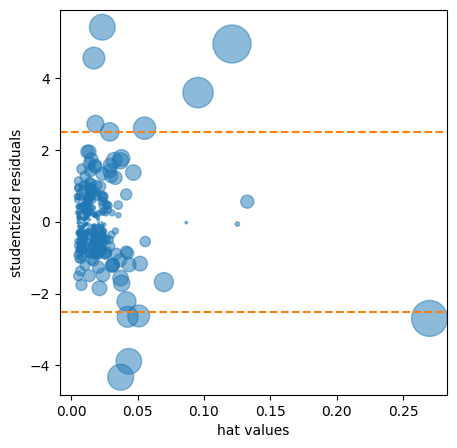

In [28]:
influence = OLSInfluence(result_98105)
fig, ax = plt.subplots(figsize=(5,5))
ax.axhline(-2.5, linestyle='--', color='C1')
ax.axhline(2.5, linestyle='--', color='C1')
ax.scatter(influence.hat_matrix_diag, influence.resid_studentized_internal, s=1000*np.sqrt(influence.cooks_distance[0]), alpha=0.5)
ax.set_xlabel('hat values')
ax.set_ylabel('studentized residuals')

### Hetroskedasticity, Non-Normality, and Correlated Errors

Text(0, 0.5, 'abs(residual)')

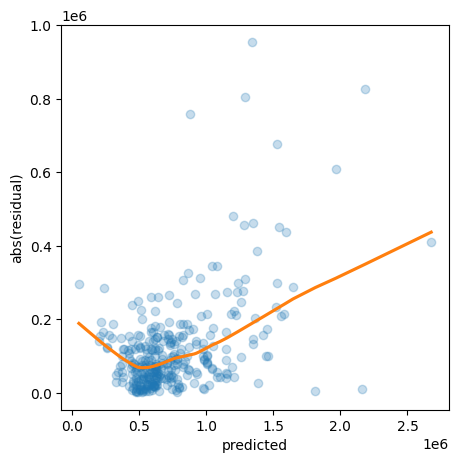

In [30]:
fig, ax = plt.subplots(figsize=(5,5))
sns.regplot(x=result_98105.fittedvalues, y=np.abs(result_98105.resid),
            scatter_kws={'alpha': 0.25}, line_kws={'color': 'C1'},
            lowess=True, ax=ax)
ax.set_xlabel('predicted')
ax.set_ylabel('abs(residual)')

### Partial Residual Plots and Nonlinearity

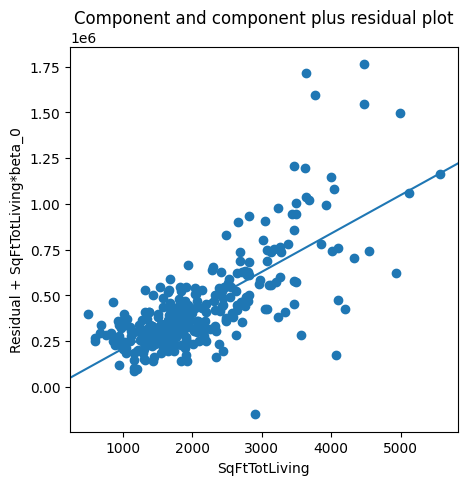

In [32]:
fig, ax = plt.subplots(figsize=(5, 5))
fig = sm.graphics.plot_ccpr(result_98105, 'SqFtTotLiving', ax=ax)

plt.show()

### Polynomial

In [33]:
model_poly = smf.ols(formula='AdjSalePrice ~ SqFtTotLiving + ' +
                     '+ I(SqFtTotLiving**2) + ' + 
                     'SqFtLot + Bathrooms + Bedrooms + BldgGrade', data=house_98105)
result_poly = model_poly.fit()
result_poly.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           AdjSalePrice   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.802
Method:                 Least Squares   F-statistic:                     211.6
Date:                Wed, 07 Jun 2023   Prob (F-statistic):          9.95e-106
Time:                        17:13:50   Log-Likelihood:                -4217.9
No. Observations:                 313   AIC:                             8450.
Df Residuals:                     306   BIC:                             8476.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept             -6.159e+05   1.03e+05     -5.953      0.000   -8.19e+05   -4.12e+05
SqFtTotLiving             7.4521     55.418      0.134      0.893    -101.597     116.501
I(SqFtTotLiving ** 2)     0.0388      0.010      4.040      0.000       0.020       0.058
SqFtLot                  32.5594      5.436      5.990      0.000      21.863      43.256
Bathrooms             -1435.1231   1.95e+04     -0.074      0.941   -3.99e+04     3.7e+04
Bedrooms              -9191.9441   1.33e+04     -0.693      0.489   -3.53e+04    1.69e+04
BldgGrade              1.357e+05   1.49e+04      9.087      0.000    1.06e+05    1.65e+05
==============================================================================
Omnibus:                       75.161   Durbin-Watson:                   1.625
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              637.978
Skew:                           0.699   Prob(JB):                    2.92e-139
Kurtosis:                       9.853   Cond. No.                     7.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Splines

In [34]:
formula = 'AdjSalePrice ~ bs(SqFtTotLiving, df=6, degree=3) + ' + 'SqFtLot + Bathrooms + BldgGrade'
model_spline = smf.ols(formula=formula, data=house_98105)
result_spline = model_spline.fit()